In [1]:
import math
import keras
from keras.layers import LeakyReLU
import tensorflow as tf
from keras import backend as K
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental.preprocessing import Normalization 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import time

### Problem 1

In [ ]:
# 1.1
# Generating trainig and test data
np.random.seed(42)

x1 = np.random.uniform(0, 100, (20, 1))
x2 = np.random.uniform(0, 100, (20, 1))
X_train = np.hstack((x1, x2))
y_train = list(map(lambda x: -1 if x == 0 else 1,(x1 > x2)))

x1 = np.random.uniform(0, 100, (1000, 1))
x2 = np.random.uniform(0, 100, (1000, 1))
X_test = np.hstack((x1, x2))
y_test = list(map(lambda x: -1 if x == 0 else 1,(x1 > x2)))

In [ ]:
# Perceptron algorithm

def loss_fn(a, y, y_pred):
  return max(0, a - (y * y_pred))

def train(a):
  # initializing with random weights
  w = np.random.rand(len(X_train[0]) + 1)
  n_epochs = 100
  learning_rate = 0.01

  # adding bias
  X = np.hstack((np.ones((len(X_train),1)), X_train))
  
  for epoch in range(n_epochs):
    for i in range(len(X)):
      dot_p = np.dot(w, X[i].T)
      loss = loss_fn(a, y_train[i], dot_p)
      if loss != 0:
        w += learning_rate * y_train[i] * X[i]
  return w

def predict(w, X):
  # adding bias
  X = np.hstack([np.ones((len(X),1)), X])
  y_pred = np.dot(w, X.T)
  return list(map(lambda x: -1 if x < 0 else 1, y_pred))

def get_accuracy(y_pred, y):
  return sum(np.array(y_pred) == np.array(y))/len(y)

In [ ]:
weights = train(a = 0)
y_pred_train = predict(weights, X_train)
train_acc = get_accuracy(y_pred_train, y_train)
print(f"Training accuracy (perceptron loss): {train_acc}")

y_pred_test = predict(weights, X_test)
test_acc = get_accuracy(y_pred_test, y_test)
print(f"Test accuracy (perceptron loss): {test_acc}")

Training accuracy (perceptron loss): 0.95
Test accuracy (perceptron loss): 0.886


In [ ]:
# 1.2
weights = train(a = 1)
y_pred_train = predict(weights, X_train)
train_acc = get_accuracy(y_pred_train, y_train)
print(f"Training accuracy (hinge loss): {train_acc}")

y_pred_test = predict(weights, X_test)
test_acc = get_accuracy(y_pred_test, y_test)
print(f"Test accuracy (hinge loss): {test_acc}")

Training accuracy (hinge loss): 0.95
Test accuracy (hinge loss): 0.959


**1.3** As seen, hinge loss provides slightly better accuracy on the test data. This is because hinge loss penalizes misclassified samples and rewards samples located farther away from the classification boundary(hyperplane). Even if new observations are classified correctly, they can incur a penalty if the margin from the decision boundary is not large enough. The distance from the hyperplane can be regarded as a measure of confidence. As a result, hinge loss promotes better training for more accurate results. Perceptron loss gives better probability estimation at the cost of accuracy.

**1.4** The classification of the same 1000 test instances will not change significantly by using a different set of 20 training points for hinge loss. I think this is because if data points are far away from the decision boundary, they anyway contribute nothing to the hinge loss. Statistically, a new set of points have a higher probability of lying away from the decision boundary, hence not affecting training with hinge loss. On the other hand, perceptron loss prioritizes fit to the underlying distribution over accuracy. Hence, it will try to better fit the new set of points and hence classification could be different.

### Problem 2

In [2]:
# 2.1
'''
vanishing gradients phenomenon using:
1. Standard normalization with different values of standard deviation and tanh and sigmoid activation functions
2. Xavier (aka Glorot normal) initialization
3. ReLU activation with Xavier vs He initialization
'''

'\nvanishing gradients phenomenon using:\n1. Standard normalization with different values of standard deviation and tanh and sigmoid activation functions\n2. Xavier (aka Glorot normal) initialization\n3. ReLU activation with Xavier vs He initialization\n'

Procedure to run the code for these figures:

1. I cloned the repo and experimented with the suggested functions. My tweaked code has been pushed to https://github.com/ayushi3004/deepreplay

2. Since it could not be run on Mac M1 due to compatibility issues, I have run it as a docker image of Ubuntu:18. The dockerfile for the same is present in the repo. The way to run it is by building and running the dockerfile as a container.

3. The output .h5 files and images weren't uploaded to the repo as they were too huge for git guidelines. The images and deductions have been mentioned here.

**2.1.a Standard normalization with sigmoid activation fn and std dev = 0.1**
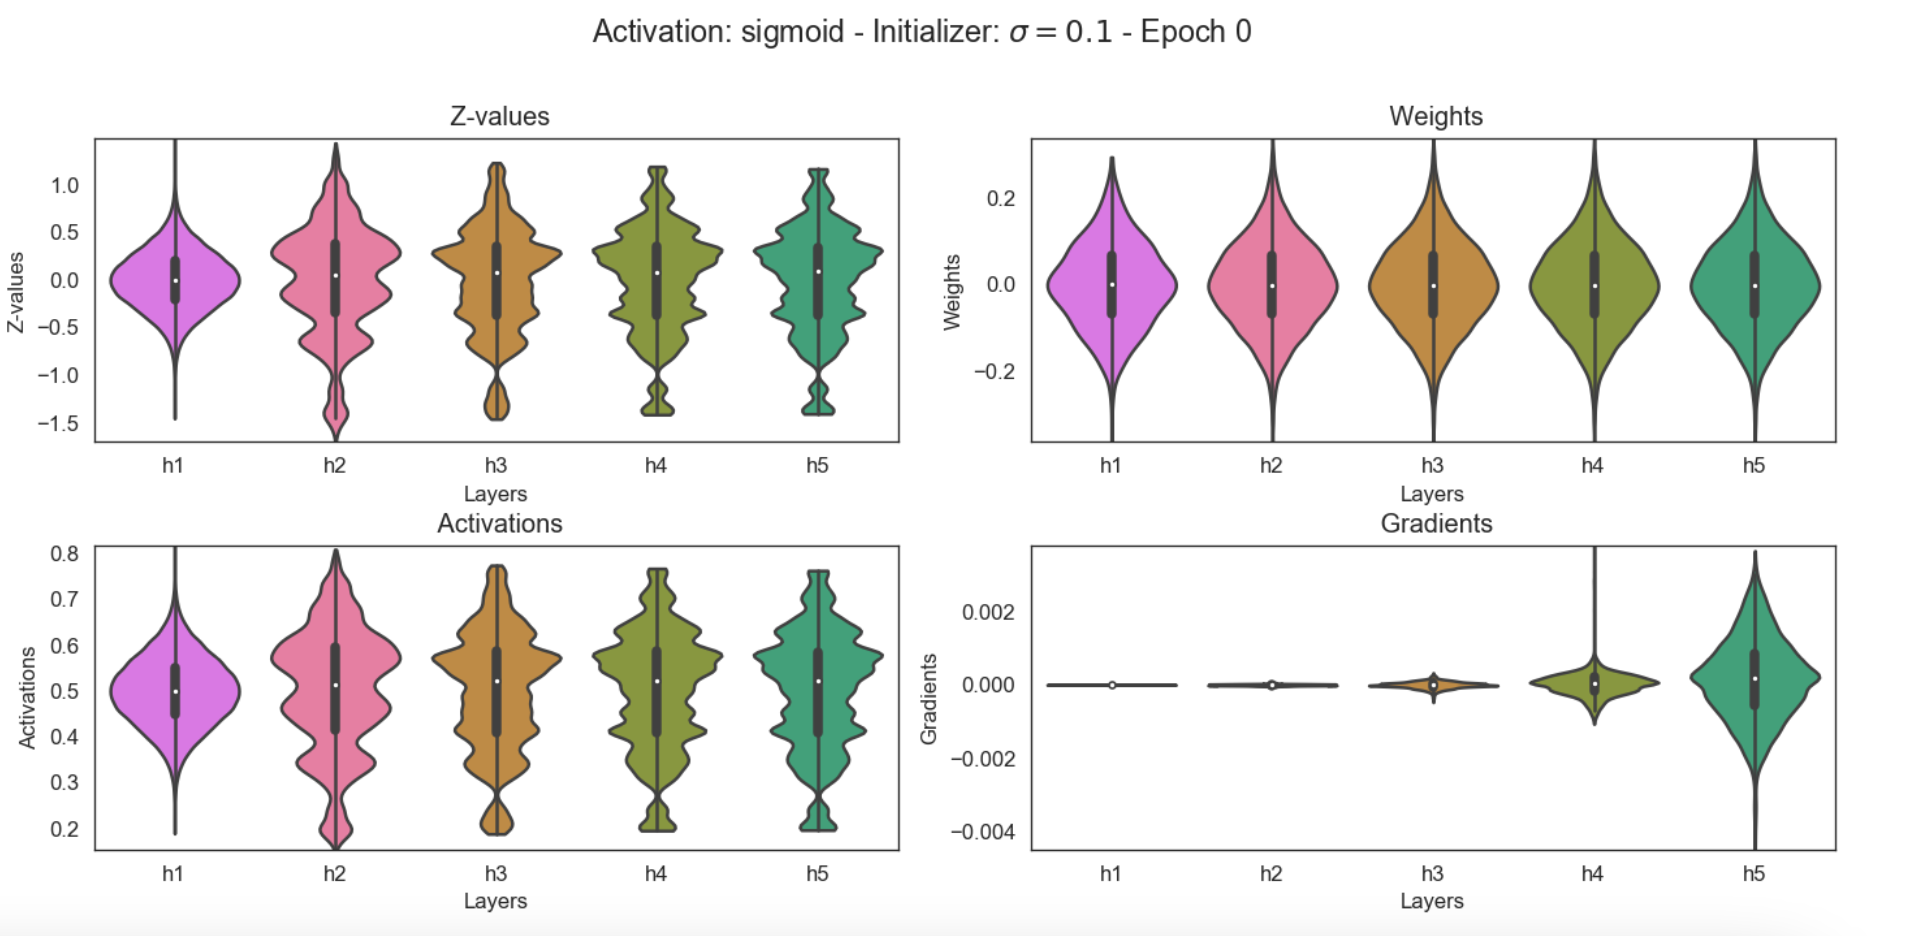

**2.1.a Standard normalization with sigmoid activation fn and std dev = 1
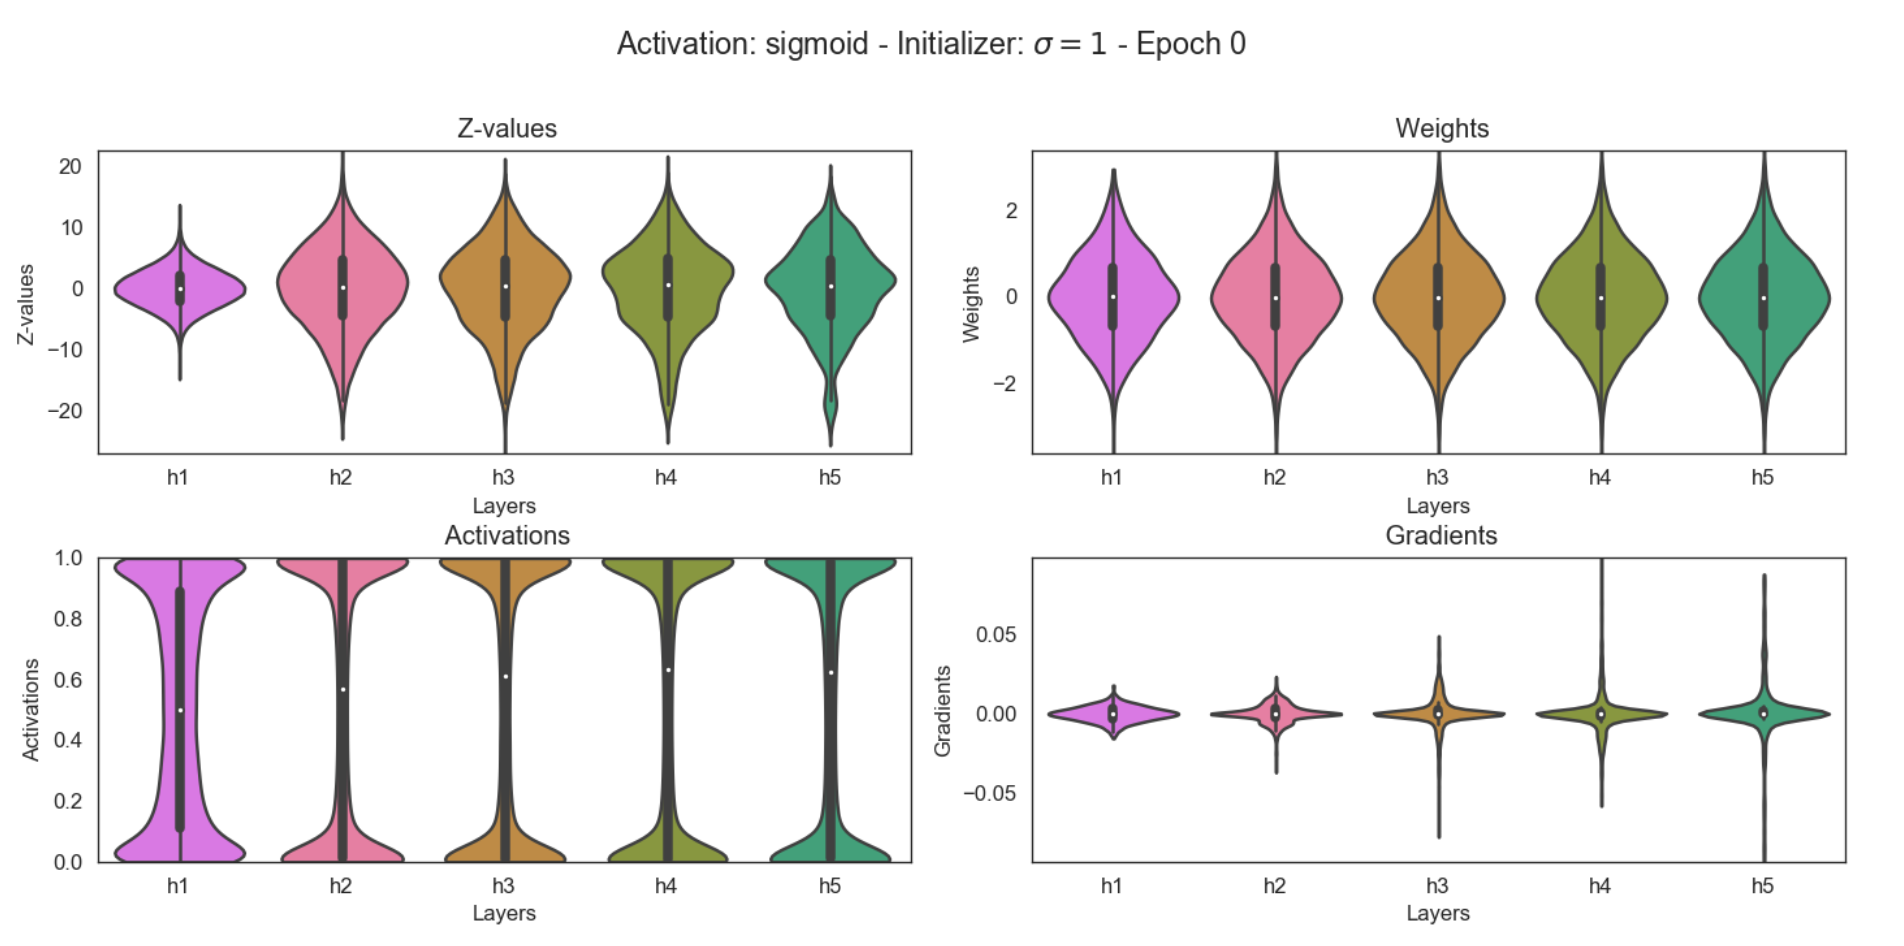**

We clearly see the vanishing gradient problem here. The gradients are nearly 0 for initial layers for std dev=0.1. It gets better for higher std dev=1.Both Z-values and activations are also within a narrow range.

**2.1.a Standard normalization with tanh activation fn and std dev = 0.1**
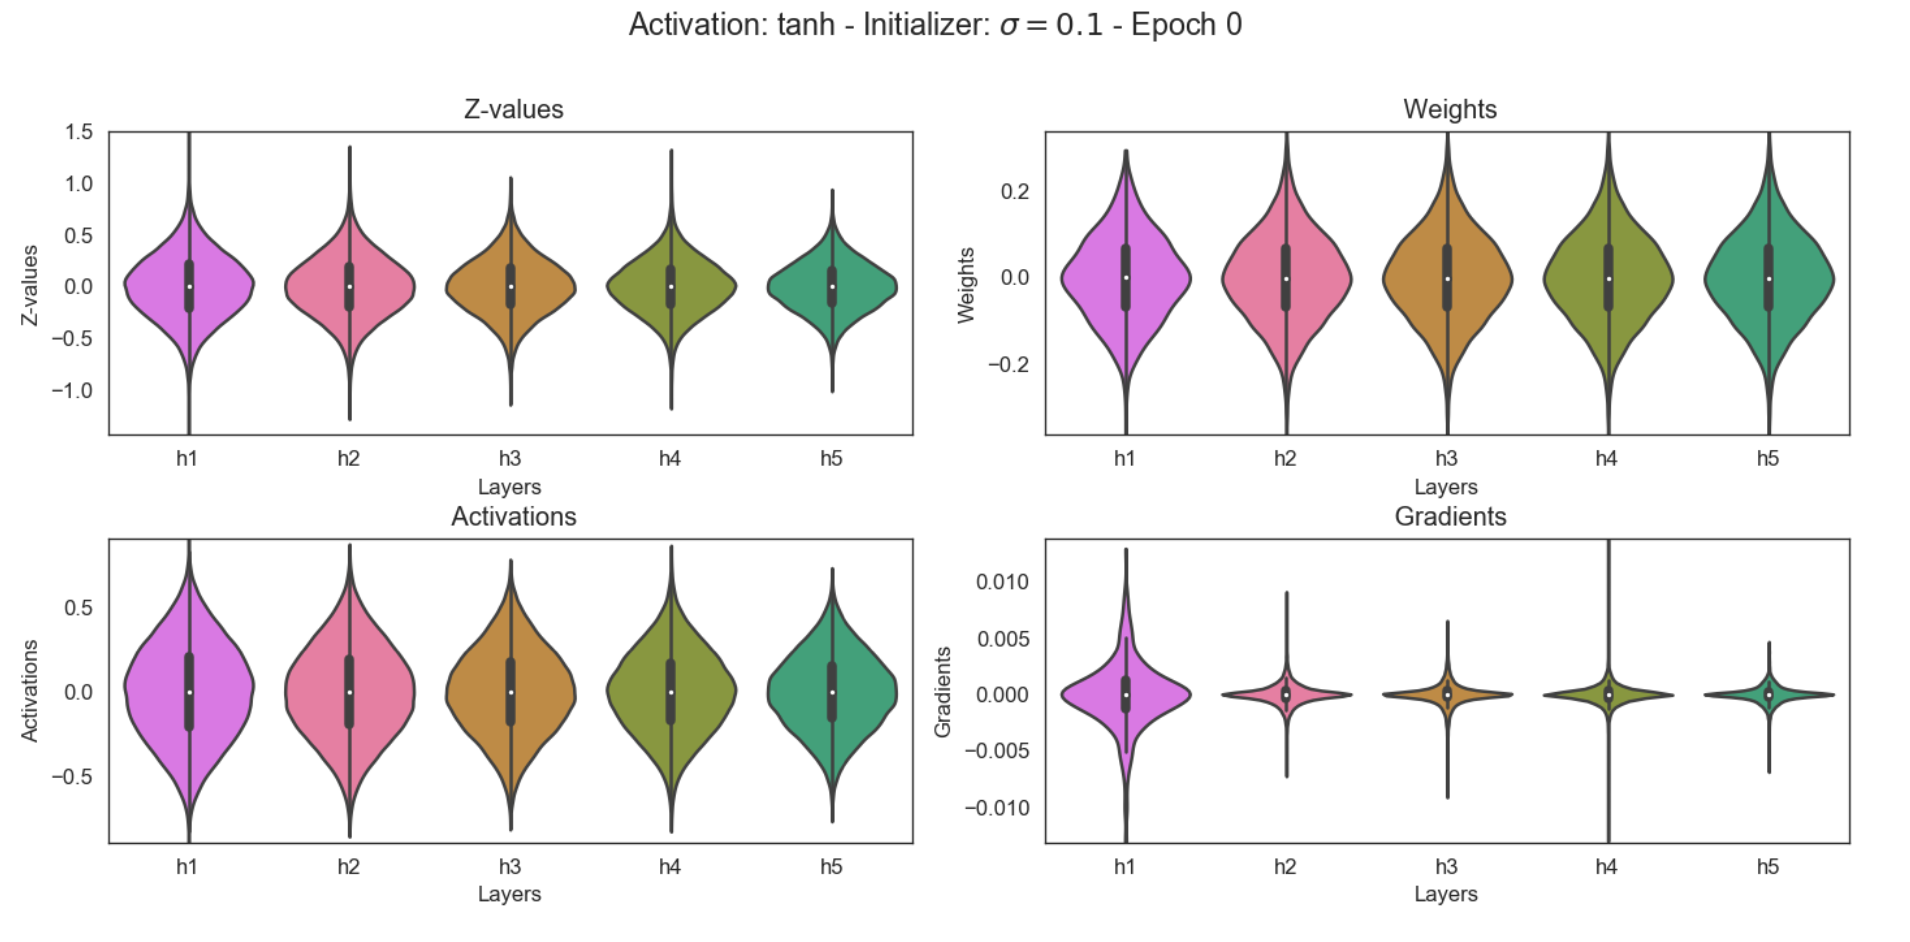

**2.1.a Standard normalization with tanh activation fn and std dev = 1**
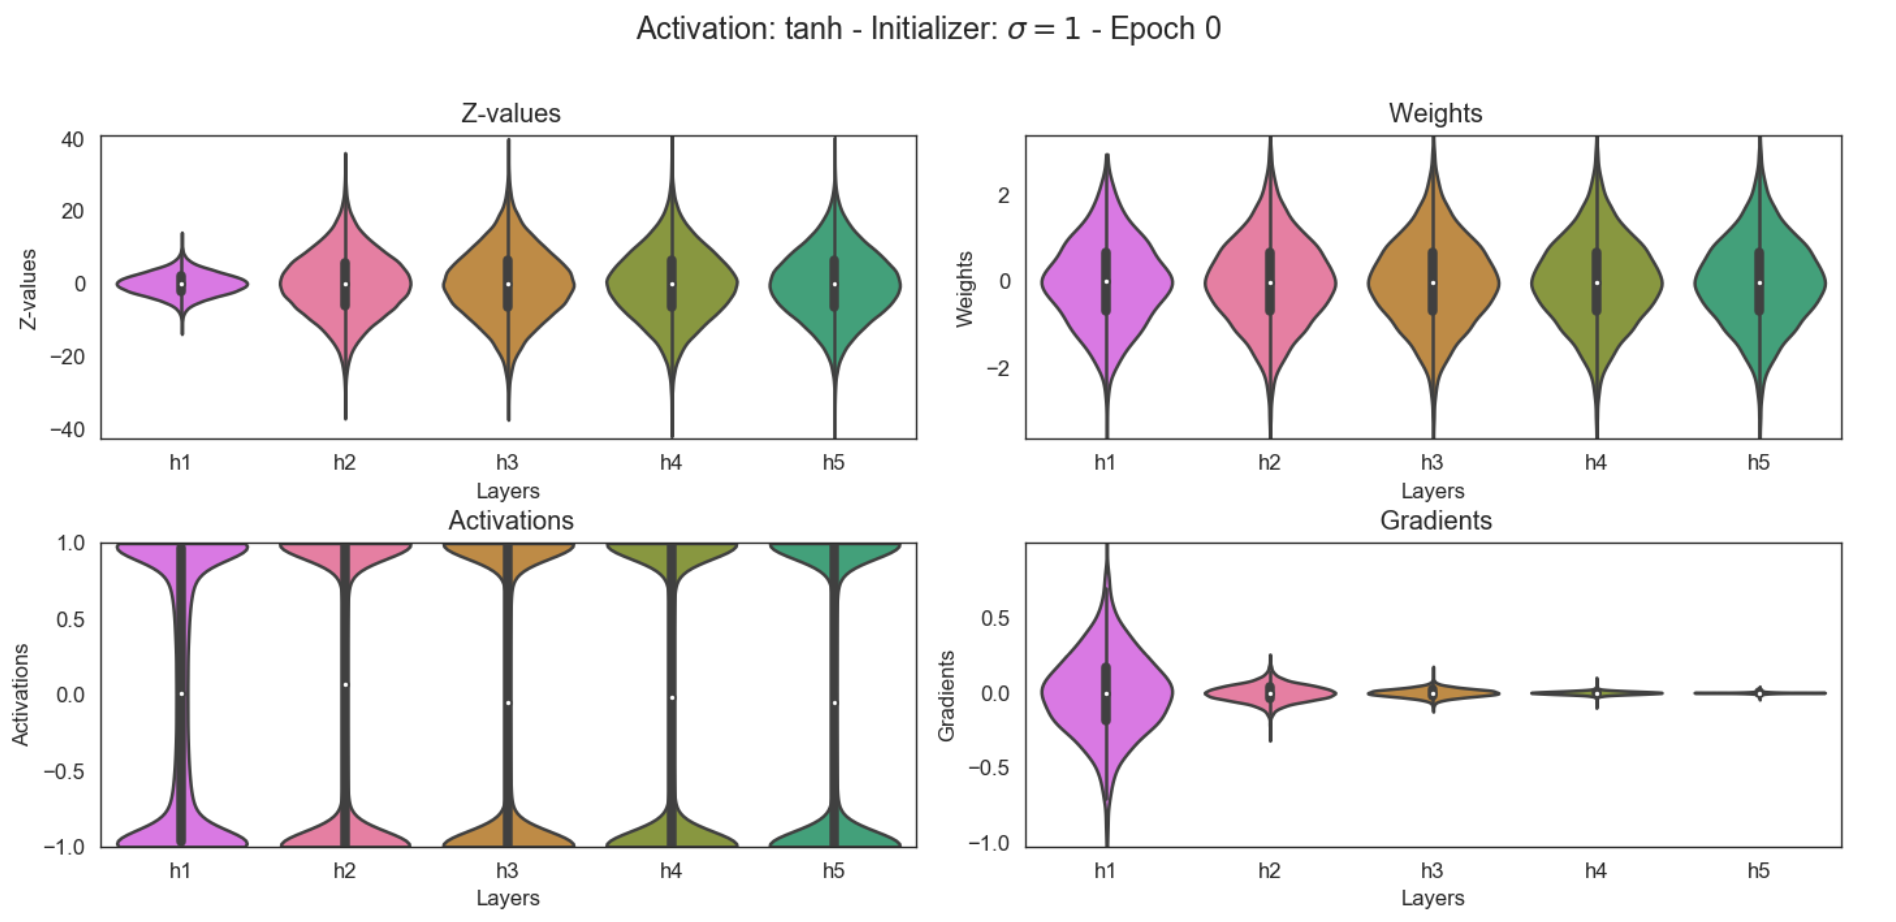

For tanh, gradients are somewhat better for std dev=0.1. Z-values and activations are similar along all the layers. 

For std dev=1, we see exploding gradients problem as we backpropagate. Z-values have extreme range and activations are collapsing into 0 or 1.


**2.1.b Tanh activation with Xavier(normal) initialization**
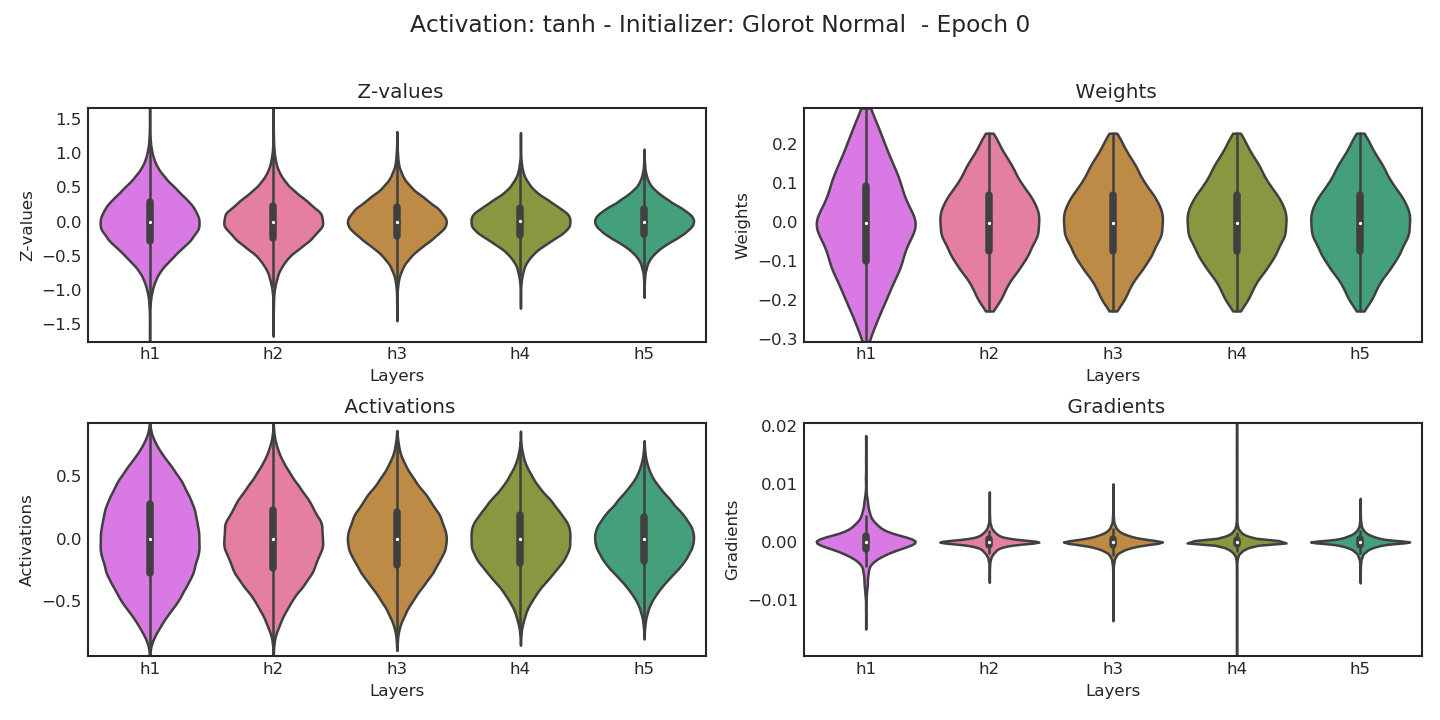

As seen, tanh activation with normal glorot performs really well. The z-scores are comparable along the layers. So are the weights, gradients and activations.

**2.1.c Relu activation with Xavier(normal) initialization**
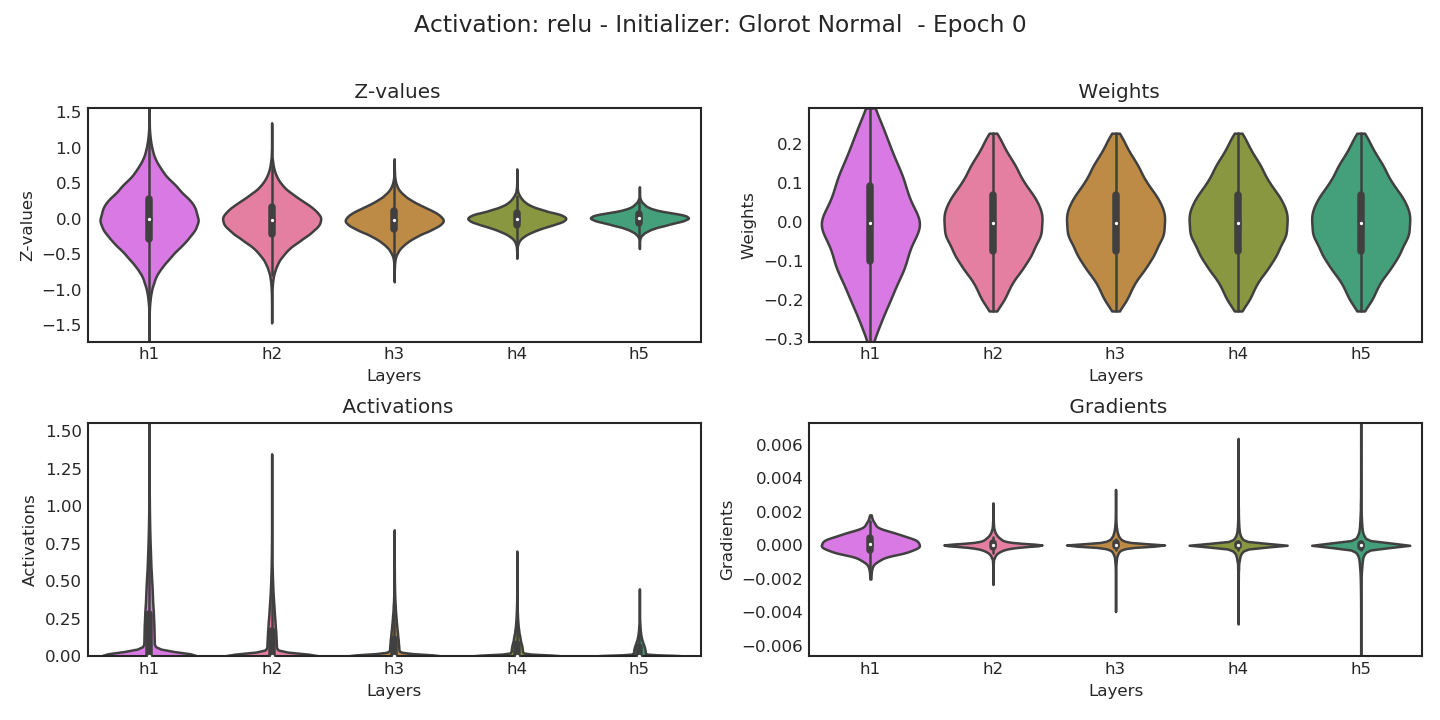

**2.1.c  Relu activation with He initialization**
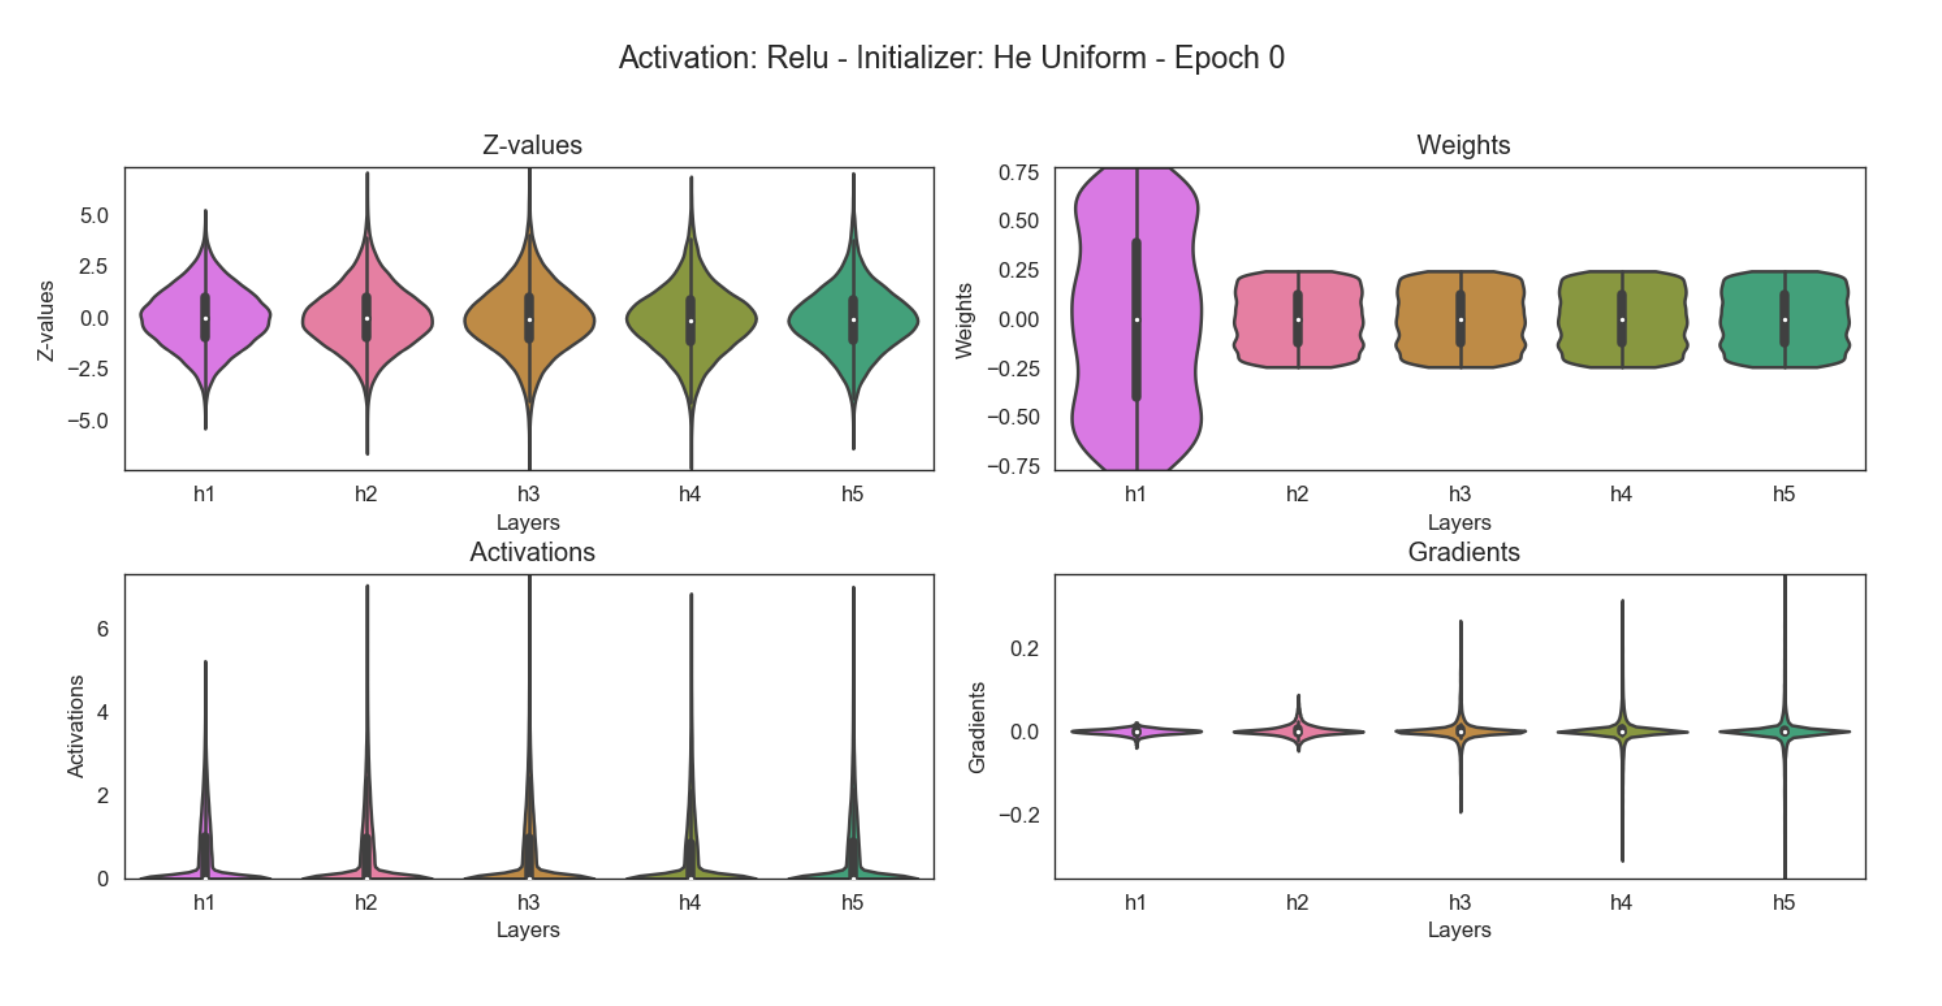

Since Glorot preserves variance and Relu halves variance, it isn't the most optimal scheme for relu. What performs better is Relu with He (uniform) initialization. The gradients if looked at scale are better in this scheme for relu activation.

In [ ]:
# 2.2

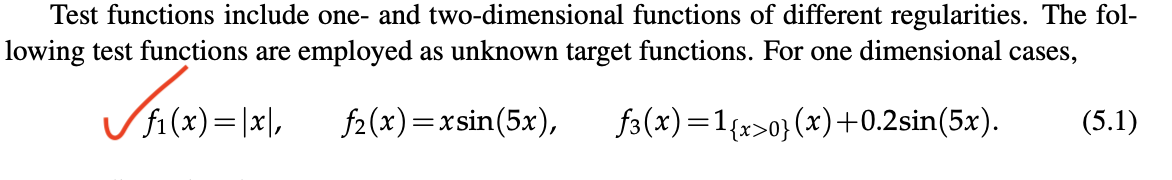

In [ ]:
num_layers = 10
num_hidden = 2
minibatch_size = 64
min_X = -np.sqrt(7)
max_X = np.sqrt(7)
n_iter = 1000
n_observations = 3000
n_epochs = 2

dying_relu_layers = [
    layers.Dense(num_hidden, activation='relu') for _ in range(9)]
dying_relu_layers.extend([layers.Dense(1, activation='relu')])

dying_relu_model = keras.Sequential(dying_relu_layers)

def dying_relu(model, A):
  test_pred = model.predict(A)
  return (np.isclose(test_pred, test_pred[0])).all()

nn_collapse_count = 0
X = np.random.uniform(min_X, max_X, size=(n_observations,1))

percent_train = 0.8
n_train = int(np.ceil(n_observations * percent_train))
X_train = X[:n_train]
X_test = X[n_train:]

start = time.time()
for i in range(n_iter):
  print("Simulation ", i)

  # I'll be using this test function from Lu et al. f(x) = |x|
  y_train = np.abs(X_train)
  
  dying_relu_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
  dying_relu_model.fit(X_train, y_train, epochs=n_epochs, batch_size = minibatch_size, verbose=0)

  is_dead_relu = dying_relu(dying_relu_model, X_test)
  nn_collapse_count += int(is_dead_relu)
  print(nn_collapse_count)

  K.clear_session()

end = time.time()

print(f"Time taken: {end - start}s")
percent_collaped = (nn_collapse_count)/n_iter * 100
print(f"Percentage of collapsed networks: {percent_collaped}")

Simulation  0
19/19 [==============================] - 0s 1ms/step
1
Simulation  1
19/19 [==============================] - 0s 2ms/step
2
Simulation  2
19/19 [==============================] - 0s 2ms/step
3
Simulation  3
19/19 [==============================] - 0s 1ms/step
4
Simulation  4
19/19 [==============================] - 0s 1ms/step
5
Simulation  5
19/19 [==============================] - 0s 1ms/step
6
Simulation  6
19/19 [==============================] - 0s 1ms/step
7
Simulation  7
19/19 [==============================] - 0s 1ms/step
8
Simulation  8
19/19 [==============================] - 0s 1ms/step
9
Simulation  9
19/19 [==============================] - 0s 2ms/step
10
Simulation  10
19/19 [==============================] - 0s 1ms/step
11
Simulation  11
19/19 [==============================] - 0s 1ms/step
12
Simulation  12
19/19 [==============================] - 0s 1ms/step
13
Simulation  13
19/19 [==============================] - 0s 1ms/step
14
Simulation  14
19/19 [===

Therefore, over 90% network collapse is seen as reported in Lu et al.

In [3]:
# 2.3
num_layers = 10
num_hidden = 2
minibatch_size = 64
min_X = -np.sqrt(7)
max_X = np.sqrt(7)
n_iter = 1000
n_observations = 3000
n_epochs = 2

leaky_relu_layers = [
    layers.Dense(num_hidden, activation=LeakyReLU(alpha=0.01), kernel_initializer='HeUniform') for _ in range(9)]
leaky_relu_layers.extend([layers.Dense(1, activation=LeakyReLU(alpha=0.01), kernel_initializer='HeUniform')])

leaky_relu_model = keras.Sequential(leaky_relu_layers)

def dying_relu(model, A):
  test_pred = model.predict(A)
  return (np.isclose(test_pred, test_pred[0])).all()

nn_collapse_count = 0
X = np.random.uniform(min_X, max_X, size=(n_observations,1))

percent_train = 0.8
n_train = int(np.ceil(n_observations * percent_train))
X_train = X[:n_train]
X_test = X[n_train:]

start = time.time()
for i in range(n_iter):
  print("Simulation ", i)

  # I'll be using this test function from Lu et al. f(x) = |x|
  y_train = np.abs(X_train)
  
  leaky_relu_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
  leaky_relu_model.fit(X_train, y_train, epochs=n_epochs, batch_size = minibatch_size, verbose=0)

  is_dead_leaky_relu = dying_relu(leaky_relu_model, X_test)
  nn_collapse_count += int(is_dead_leaky_relu)
  print(nn_collapse_count)

  K.clear_session()

end = time.time()

print(f"Time taken: {end - start}s")
percent_collaped = (nn_collapse_count)/n_iter * 100
print(f"Percentage of collapsed networks: {percent_collaped}")

Simulation  0
19/19 [==============================] - 0s 2ms/step
0
Simulation  1
19/19 [==============================] - 0s 1ms/step
0
Simulation  2
19/19 [==============================] - 0s 2ms/step
0
Simulation  3
19/19 [==============================] - 0s 2ms/step
0
Simulation  4
19/19 [==============================] - 0s 2ms/step
0
Simulation  5
19/19 [==============================] - 0s 2ms/step
0
Simulation  6
19/19 [==============================] - 0s 2ms/step
0
Simulation  7
19/19 [==============================] - 0s 2ms/step
0
Simulation  8
19/19 [==============================] - 0s 2ms/step
0
Simulation  9
19/19 [==============================] - 0s 2ms/step
0
Simulation  10
19/19 [==============================] - 0s 2ms/step
0
Simulation  11
19/19 [==============================] - 0s 2ms/step
0
Simulation  12
19/19 [==============================] - 0s 1ms/step
0
Simulation  13
19/19 [==============================] - 0s 2ms/step
0
Simulation  14
19/19 [========

As seen here, Leaky ReLU helped in preventing dying neurons with exactly the same architecture.

### Problem 3

3.1

**Co-adaptation**: means that some neurons are highly dependent on others. This means missing even a few critical neurons would result in performance failure of the neural network. Eg: In XOR, we need 2 units to represent the function correctly but we can pass 100 and most of them will be redundant. This will also cause over-fitting as the nodes instead of generalising on the training data prioritize fitting on the training data. Droupout is a regularization technique to overcome this.


**Internal covariance-shift** means change in the distribution of network activations due to the change in network parameters during training. When the input distribution changes, hidden layers try to learn to adapt to the new distribution. This slows down the training process. 
Batch normalization is a method intended to mitigate internal covariance shift by normalizing the inputs to each hidden layer so that their distribution is fairly constant as training proceeds. 

In [9]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train = X_train / 255.0
X_train = tf.expand_dims(X_train, 3)
X_test = X_test / 255.0
X_test = tf.expand_dims(X_test, 3)

In [10]:
def plot_params(batch_layer_wts):
  fig,((axis0,axis1)) = plt.subplots(1,2,figsize=(20,10)) 
  # gamma and beta
  sns.violinplot(batch_layer_wts[0], ax=axis0)
  sns.violinplot(batch_layer_wts[1], ax=axis1)
  
  axis0.set_xlabel("Learned batch norm parameters")
  axis1.set_xlabel("Learned batch norm parameters")

def get_batch_norm_params(model, num_layers): 
  for i in range(1,num_layers+1):
    wts = model.get_layer("bn"+str(i)).get_weights()
    plot_params(wts)

In [11]:
n_epochs = 30
b_size = 50

In [12]:
# 3.2
le_net_model2 = keras.Sequential()

le_net_model2.add(layers.Conv2D(6, kernel_size=3, strides=1, activation='relu',input_shape=X_train[0].shape, padding='same'))
le_net_model2.add(layers.BatchNormalization(name="bn1"))
le_net_model2.add(layers.AveragePooling2D())

le_net_model2.add(layers.Conv2D(filters=16, kernel_size=3, activation='relu'))
le_net_model2.add(layers.BatchNormalization(name="bn2"))
le_net_model2.add(layers.AveragePooling2D())

le_net_model2.add(layers.Flatten())
le_net_model2.add(layers.Dense(units=120, activation='relu'))
le_net_model2.add(layers.BatchNormalization(name="bn3"))

le_net_model2.add(layers.Flatten())
le_net_model2.add(layers.Dense(units=84, activation='relu'))
le_net_model2.add(layers.BatchNormalization(name="bn4"))

le_net_model2.add(layers.Dense(units=10, activation = 'softmax'))

# standard normalization for input layer
input_layer = Normalization()
input_layer.adapt(X_train)
X_train_norm = input_layer(X_train)
X_test_norm = input_layer(X_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0297 - accuracy: 0.9927


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

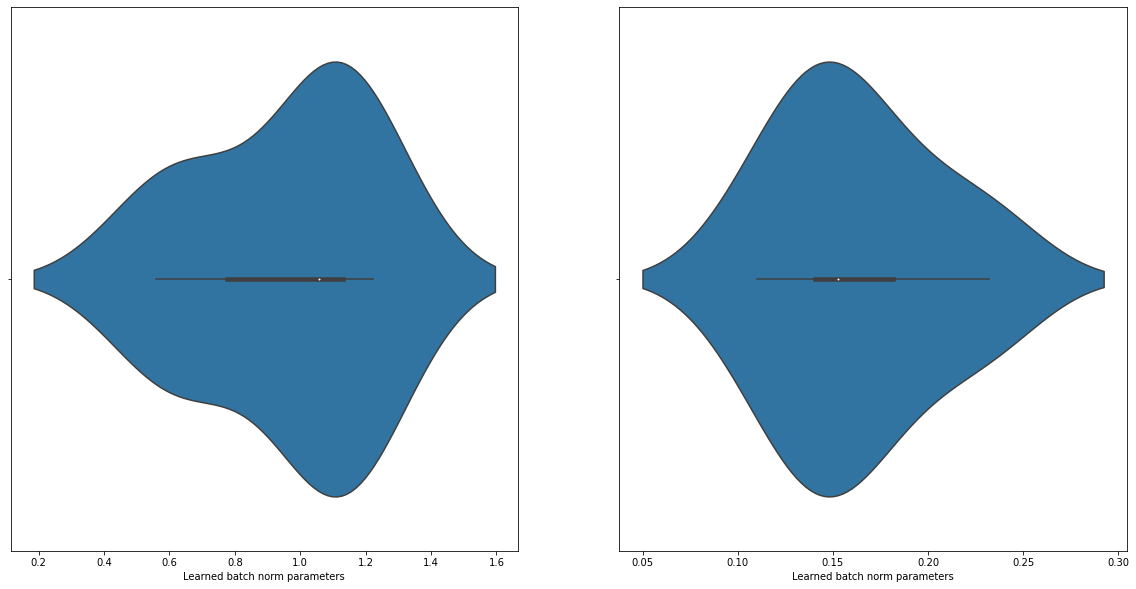

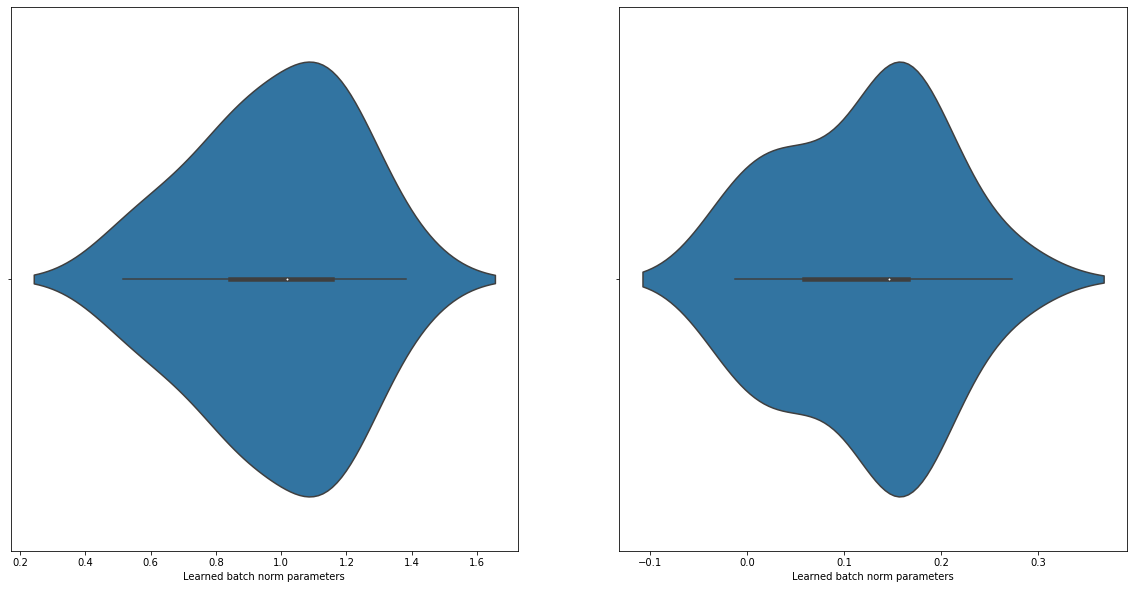

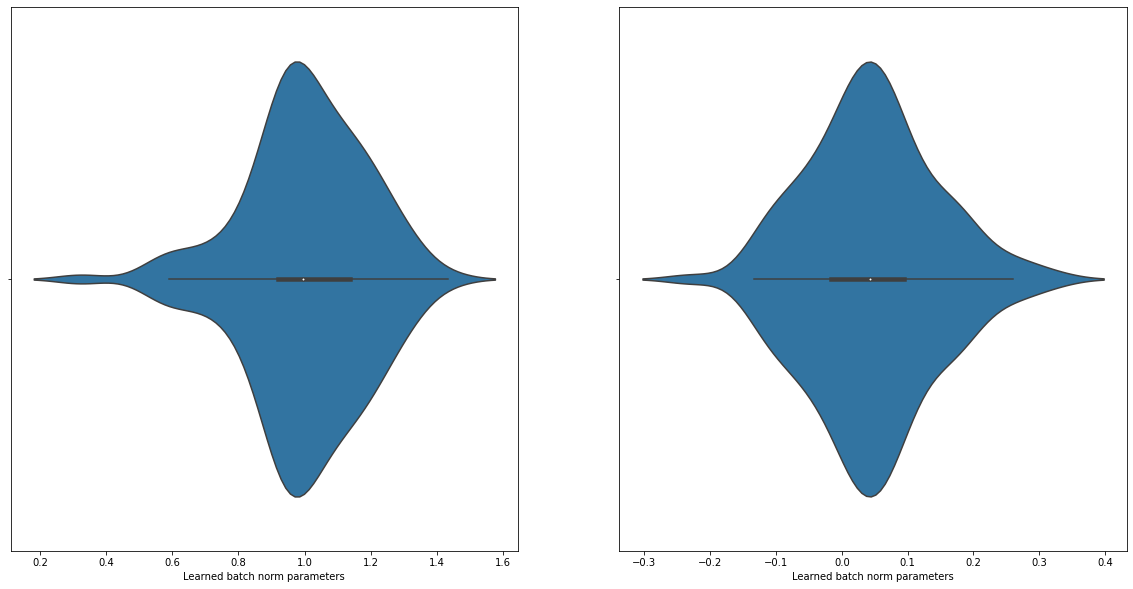

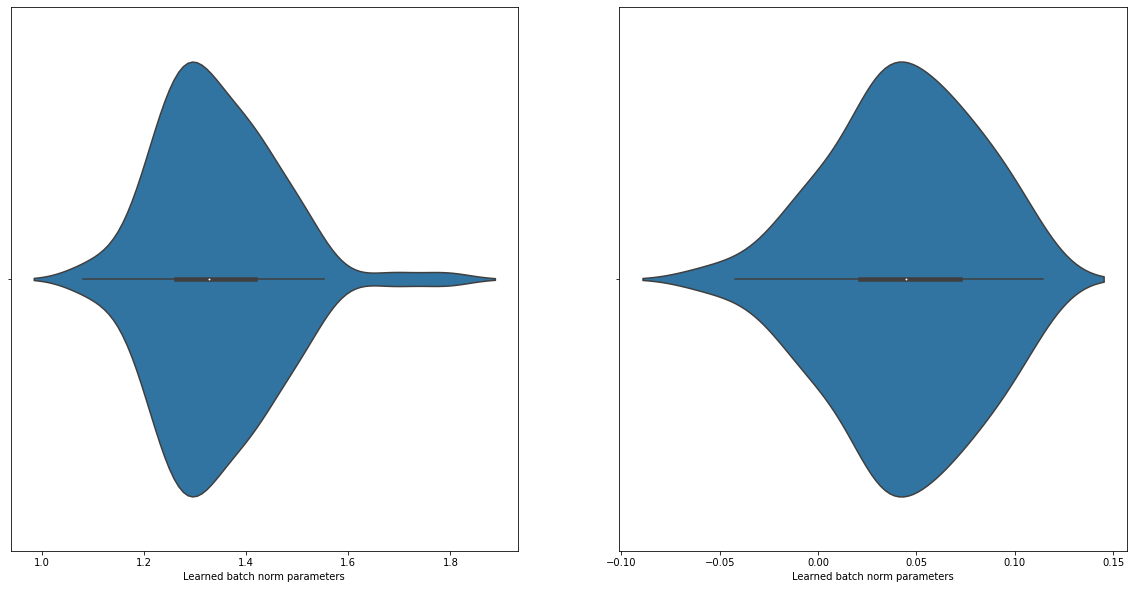

In [13]:
# test
le_net_model2.compile(
    optimizer='adam', 
    loss=keras.losses.sparse_categorical_crossentropy, 
    metrics=['accuracy']
)

train_history2 = le_net_model2.fit(X_train_norm, y_train, epochs=n_epochs, batch_size=b_size, verbose=0)

test_score2 = le_net_model2.evaluate(X_test_norm, y_test)
get_batch_norm_params(le_net_model2, 4)

In [14]:
print(f"Standard normalisation input layer, loss: {test_score2[0]}, accuracy: {test_score2[1]}")

Standard normalisation input layer, loss: 0.029717471450567245, accuracy: 0.9926999807357788


In [15]:
# 3.3
le_net_model3 = keras.Sequential()

# batch normalization for input layer
le_net_model3.add(layers.BatchNormalization(name="bn1"))

le_net_model3.add(layers.Conv2D(6, kernel_size=3, strides=1, activation='relu', input_shape=X_train[0].shape, padding='same'))
le_net_model3.add(layers.BatchNormalization(name="bn2"))
le_net_model3.add(layers.AveragePooling2D())

le_net_model3.add(layers.Conv2D(filters=16, kernel_size=3, activation='relu'))
le_net_model3.add(layers.BatchNormalization(name="bn3"))
le_net_model3.add(layers.AveragePooling2D())

le_net_model3.add(layers.Flatten())
le_net_model3.add(layers.Dense(units=120, activation='relu'))
le_net_model3.add(layers.BatchNormalization(name="bn4"))

le_net_model3.add(layers.Flatten())
le_net_model3.add(layers.Dense(units=84, activation='relu'))
le_net_model3.add(layers.BatchNormalization(name="bn5"))

le_net_model3.add(layers.Dense(units=10, activation = 'softmax'))

313/313 [==============================] - 1s 3ms/step - loss: 0.0393 - accuracy: 0.9905


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

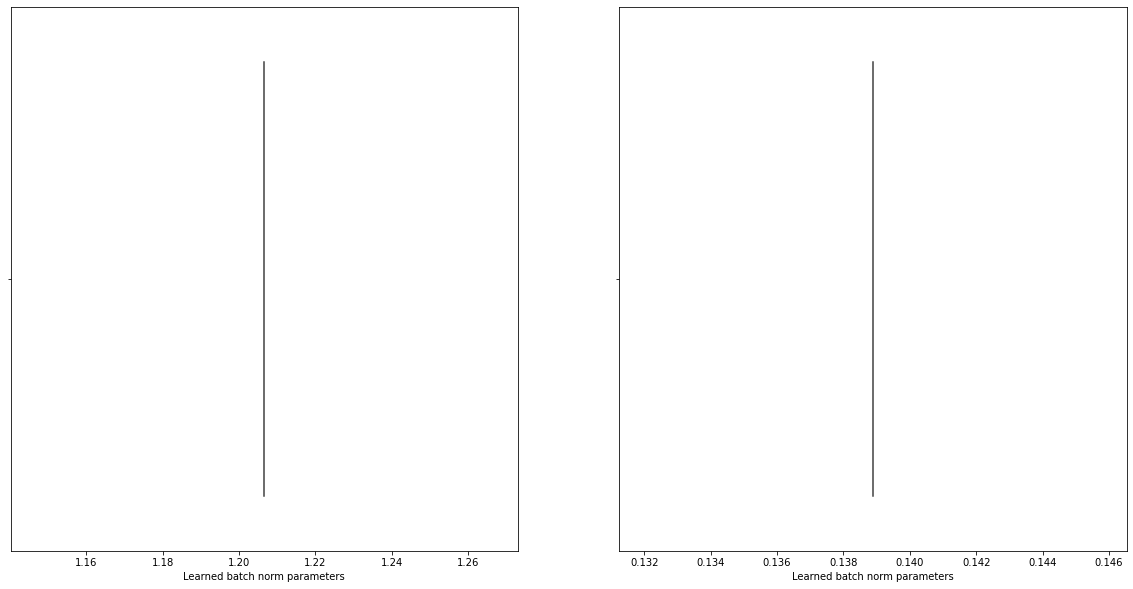

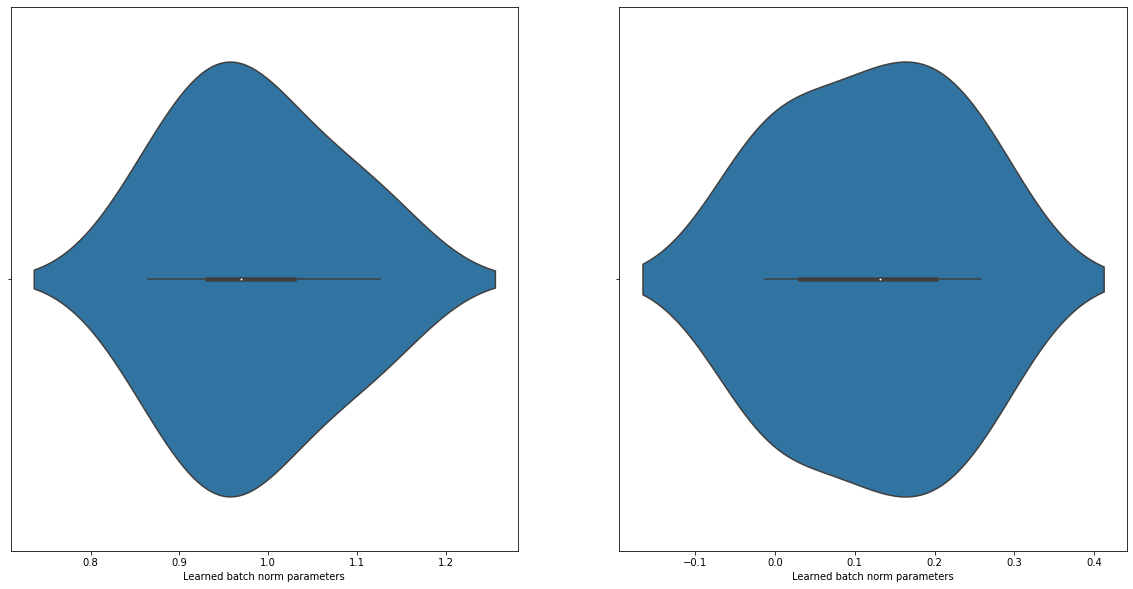

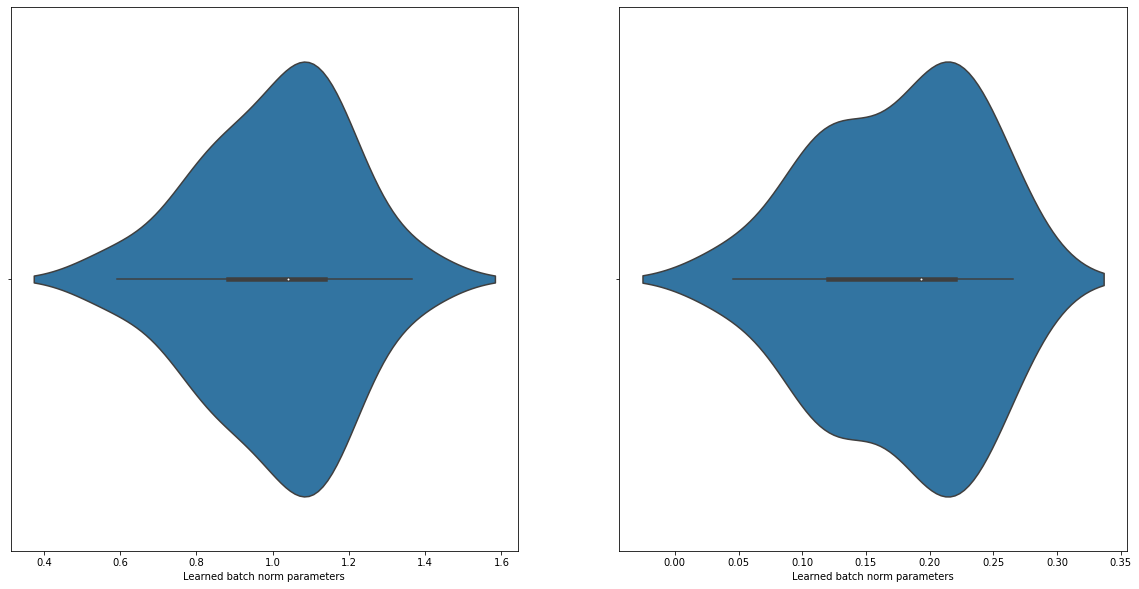

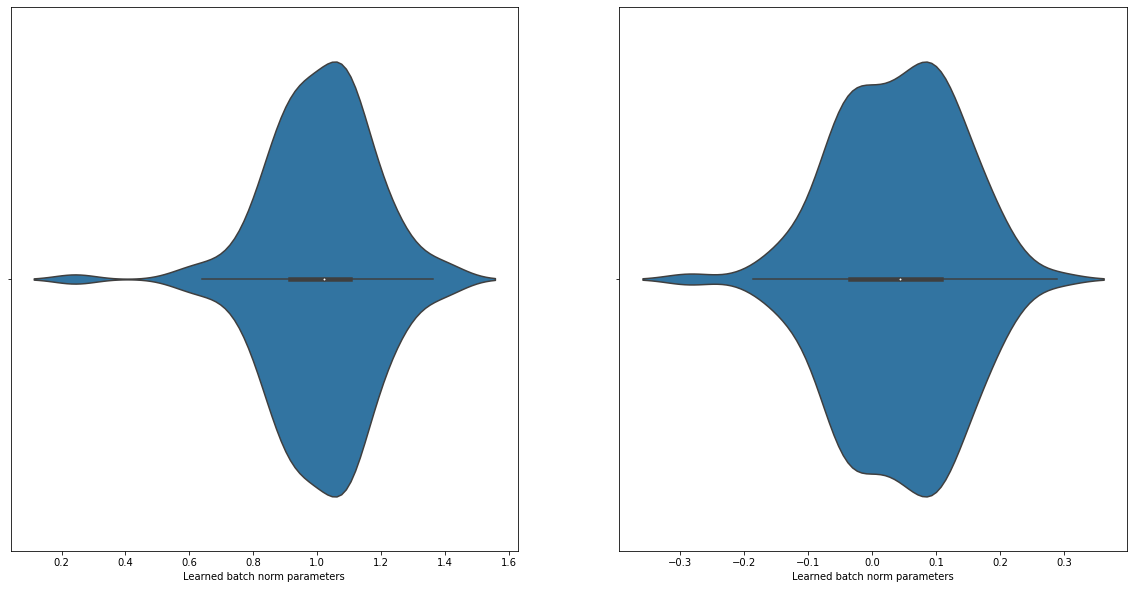

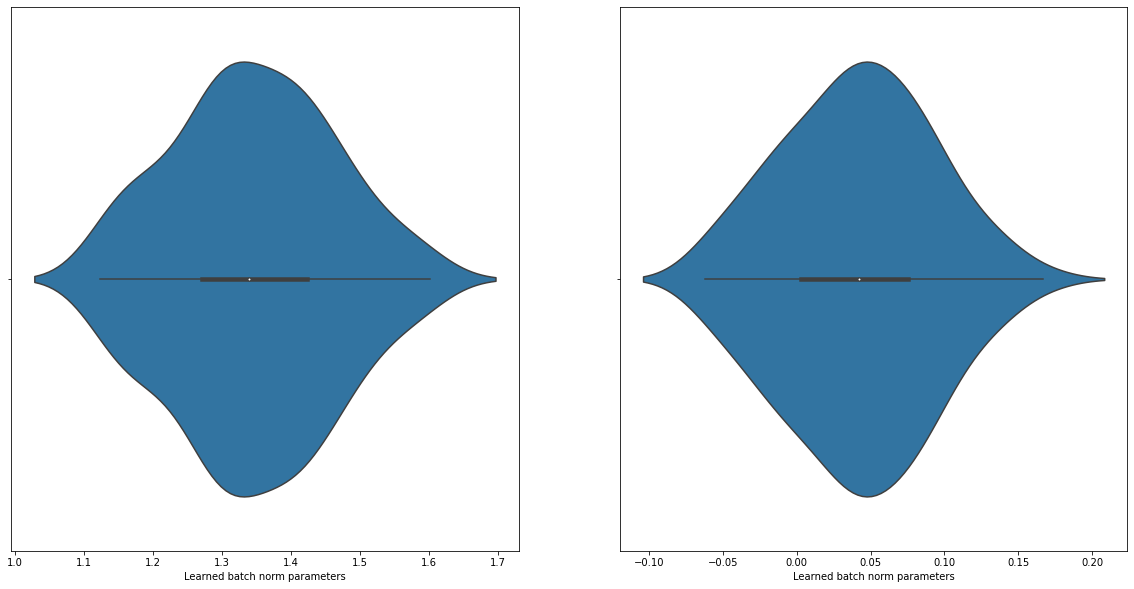

In [16]:
# test
le_net_model3.compile(
    optimizer='adam', 
    loss=keras.losses.sparse_categorical_crossentropy, 
    metrics=['accuracy']
)

train_history3 = le_net_model3.fit(X_train, y_train, epochs=n_epochs, batch_size=b_size, verbose=0)

test_score3 = le_net_model3.evaluate(X_test, y_test)
get_batch_norm_params(le_net_model3, 5)

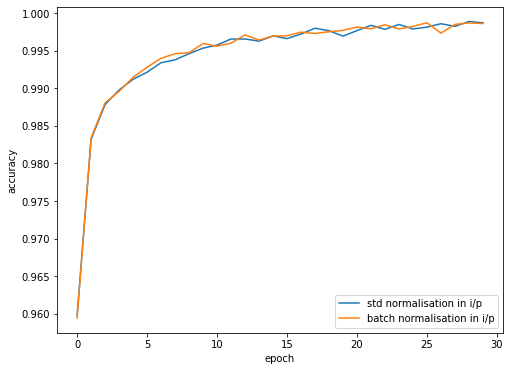

In [17]:
# comparing train accuracy
def plot_train_acc(hist1, hist2): 
  plt.figure(figsize= (8,6))
  plt.plot(hist1.history['accuracy'])
  plt.plot(hist2.history['accuracy'])
  plt.ylabel('accuracy') 
  plt.xlabel('epoch')
  plt.legend(['std normalisation in i/p', 'batch normalisation in i/p'])

plot_train_acc(train_history2, train_history3)

In [18]:
# comparing test loss and accuracy
print(f"Standard normalisation input layer, loss: {test_score2[0]}, accuracy: {test_score2[1]}")
print(f"Batch normalisation input layer, loss: {test_score3[0]},accuracy: {test_score3[1]}")

Standard normalisation input layer, loss: 0.029717471450567245, accuracy: 0.9926999807357788
Batch normalisation input layer, loss: 0.03932548314332962,accuracy: 0.9904999732971191


As seen, model with standard normalization for input layer was a bit better (accurate) than the one with batch normalization in all layers.

In [19]:
# 3.4
le_net_model4 = keras.Sequential()

# batch normalization for input layer
le_net_model4.add(layers.Dropout(0.2))

le_net_model4.add(layers.Conv2D(6, kernel_size=3, strides=1, activation='relu', input_shape=X_train[0].shape, padding='same'))
le_net_model4.add(layers.Dropout(0.5))
le_net_model4.add(layers.AveragePooling2D())

le_net_model4.add(layers.Conv2D(filters=16, kernel_size=3, activation='relu'))
le_net_model4.add(layers.Dropout(0.5))
le_net_model4.add(layers.AveragePooling2D())

le_net_model4.add(layers.Flatten())
le_net_model4.add(layers.Dense(units=120, activation='relu'))
le_net_model4.add(layers.Dropout(0.5))

le_net_model4.add(layers.Flatten())
le_net_model4.add(layers.Dense(units=84, activation='relu'))
le_net_model4.add(layers.Dropout(0.5))

le_net_model4.add(layers.Dense(units=10, activation = 'softmax'))

In [20]:
# test
le_net_model4.compile(
    optimizer='adam', 
    loss=keras.losses.sparse_categorical_crossentropy, 
    metrics=['accuracy']
)

train_history4 = le_net_model4.fit(X_train, y_train, epochs=n_epochs, batch_size=b_size, verbose=0)

test_score4 = le_net_model4.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0470 - accuracy: 0.9854


In [21]:
print(f"Standard normalisation input layer, loss: {test_score2[0]}, accuracy: {test_score2[1]}")
print(f"Batch normalisation input layer, loss: {test_score3[0]}, accuracy: {test_score3[1]}")
print(f"Dropout in all layers, loss: loss: {test_score4[0]}, accuracy: {test_score4[1]}")

Standard normalisation input layer, loss: 0.029717471450567245, accuracy: 0.9926999807357788
Batch normalisation input layer, loss: 0.03932548314332962, accuracy: 0.9904999732971191
Dropout in all layers, loss: loss: 0.04698525369167328, accuracy: 0.9854000210762024


As seen, accuracy for dropout model was less than both normalisation models.

In [22]:
# 3.5
le_net_model5 = keras.Sequential()

# batch normalization for input layer
le_net_model5.add(layers.Dropout(0.2))
le_net_model5.add(layers.BatchNormalization())

le_net_model5.add(layers.Conv2D(6, kernel_size=3, strides=1, activation='relu', input_shape=X_train[0].shape, padding='same'))
le_net_model5.add(layers.BatchNormalization())
le_net_model5.add(layers.AveragePooling2D())
le_net_model5.add(layers.Dropout(0.5))

le_net_model5.add(layers.Conv2D(filters=16, kernel_size=3, activation='relu'))
le_net_model5.add(layers.BatchNormalization())
le_net_model5.add(layers.AveragePooling2D())
le_net_model5.add(layers.Dropout(0.5))

le_net_model5.add(layers.Flatten())
le_net_model5.add(layers.Dense(units=120, activation='relu'))
le_net_model5.add(layers.BatchNormalization())
le_net_model5.add(layers.Dropout(0.5))

le_net_model5.add(layers.Flatten())
le_net_model5.add(layers.Dense(units=84, activation='relu'))
le_net_model5.add(layers.BatchNormalization())
le_net_model5.add(layers.Dropout(0.5))

le_net_model5.add(layers.Dense(units=10, activation = 'softmax'))

In [23]:
# test
le_net_model5.compile(
    optimizer='adam', 
    loss=keras.losses.sparse_categorical_crossentropy, 
    metrics=['accuracy']
)

train_history5 = le_net_model5.fit(X_train, y_train, epochs=n_epochs, batch_size=b_size, verbose=0)

test_score5 = le_net_model5.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0536 - accuracy: 0.9833


In [24]:
print(f"Standard normalisation input layer, loss: {test_score2[0]}, accuracy: {test_score2[1]}")
print(f"Batch normalisation input layer, loss: {test_score3[0]}, accuracy: {test_score3[1]}")
print(f"Dropout in all layers, accuracy: loss: {test_score4[0]}, {test_score4[1]}")
print(f"Batch normalisation and Dropout in all layers, loss: {test_score5[0]}, accuracy: {test_score5[1]}")

Standard normalisation input layer, loss: 0.029717471450567245, accuracy: 0.9926999807357788
Batch normalisation input layer, loss: 0.03932548314332962, accuracy: 0.9904999732971191
Dropout in all layers, accuracy: loss: 0.04698525369167328, 0.9854000210762024
Batch normalisation and Dropout in all layers, loss: 0.05361231788992882, accuracy: 0.983299970626831


As seen, this model's performance is slightly less than rest of the models. What would be perhaps be best is std normalization for input + batch norm + dropout in rest of the layers.

### Problem 4

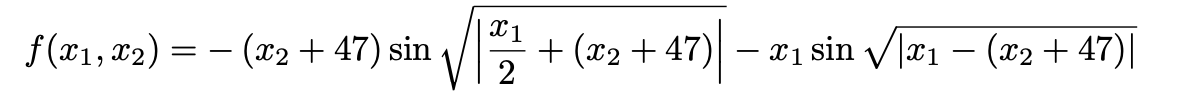

Note: The following problem wasn't trained on GPU because of extremely small GPU limits on Colab. I ran out of GPU runtime via various accounts.

Hence, this may affect the time taken for the models but the relative performance of the models will be the same.

In [25]:
np.random.seed(42)

n_observations = 100000

def f(a, b):
  return -(b + 47) * np.sin(np.sqrt(np.abs(a/2 + (b+47)))) - a * np.sin(np.sqrt(np.abs(a - (b + 47))))

x1 = np.random.uniform(-512, 512, n_observations)
x2 = np.random.uniform(-512, 512, n_observations)
comb_X = np.c_[x1, x2]

percent_train = 0.8
n_train = int(np.ceil(n_observations * percent_train))

X_train = comb_X[:n_train, :]
f_X_train = f(X_train[:,0], X_train[:,1])
y_train = f_X_train + 0.03 * np.random.normal(0.0, 0.03, X_train.shape[0])

X_test = comb_X[n_train:, :]
f_X_test = f(X_test[:,0], X_test[:,1])
y_test = f_X_test + 0.03 * np.random.normal(0.0, 0.03, X_test.shape[0])

print(f"X_train: {X_train.shape}, y_train: {y_train.shape}, X_test: {X_test.shape}, y_test: {y_test.shape}")

X_train: (80000, 2), y_train: (80000,), X_test: (20000, 2), y_test: (20000,)


In [26]:
uni_model_1 = [
    keras.Sequential(
        [layers.Dense(32, activation='relu'), 
        layers.Dense(1, kernel_initializer='normal', activation='linear')]),
    keras.Sequential(
        [layers.Dense(128, activation='relu'), 
        layers.Dense(1, kernel_initializer='normal', activation='linear')]),
    keras.Sequential(
        [layers.Dense(512, activation='relu'), 
        layers.Dense(1, kernel_initializer='normal', activation='linear')])
    ]

uni_model_2 = [
    keras.Sequential(
        [layers.Dense(32, activation='relu'), 
        layers.BatchNormalization(), 
         
         layers.Dense(64, activation='relu'),
         layers.BatchNormalization(),

         layers.Dense(1, kernel_initializer='normal', activation='linear')]
    ),
    keras.Sequential(
        [layers.Dense(32, activation='relu'), 
        layers.BatchNormalization(), 
         
         layers.Dense(128, activation='relu'),
         layers.BatchNormalization(),

         layers.Dense(1, kernel_initializer='normal', activation='linear')]
    ),
    keras.Sequential(
        [layers.Dense(16, activation='relu'), 
        layers.BatchNormalization(), 
         
         layers.Dense(256, activation='relu'),
         layers.BatchNormalization(),

         layers.Dense(1, kernel_initializer='normal', activation='linear')]
    ),
    ]

uni_model_3 = [
    keras.Sequential([
        layers.Dense(16, activation='relu'), 
        layers.BatchNormalization(), 
         
        layers.Dense(32, activation='relu'), 
        layers.BatchNormalization(), 

        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),

        layers.Dense(1, kernel_initializer='normal', activation='linear')
    ]),
    keras.Sequential([
        layers.Dense(16, activation='relu'), 
        layers.BatchNormalization(), 
         
        layers.Dense(64, activation='relu'), 
        layers.BatchNormalization(), 

        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),

        layers.Dense(1, kernel_initializer='normal', activation='linear')
    ]),
    keras.Sequential([
        layers.Dense(32, activation='relu'), 
        layers.BatchNormalization(), 
         
        layers.Dense(128, activation='relu'), 
        layers.BatchNormalization(), 

        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),

        layers.Dense(1, kernel_initializer='normal', activation='linear')
    ])
    ]

In [27]:
hiddent_units_1_list = [32, 128, 512]
hiddent_units_2_list = [97, 161, 273]
hiddent_units_3_list = [177, 337, 417]
b_size = 1000
n_epochs = 2000

In [28]:
uni_model_1_err, uni_model_1_time, uni_model_1_params = [], [], []
uni_model_2_err, uni_model_2_time, uni_model_2_params = [], [], []
uni_model_3_err, uni_model_3_time, uni_model_3_params = [], [], []


optim = tf.keras.optimizers.SGD(
    learning_rate=0.008, 
    nesterov=True, 
    clipvalue=0.5,
    momentum=0.9
    )

for model1 in uni_model_1:
  start = time.time()
  model1.compile(optimizer = optim, loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])
  model1.fit(X_train, y_train, epochs = n_epochs, batch_size = b_size, verbose = 0)
  loss = model1.evaluate(X_test, y_test)
  end = time.time()
  
  uni_model_1_err.append(loss[1])
  uni_model_1_time.append((end-start))
  uni_model_1_params.append(model1.count_params())

625/625 [==============================] - 1s 2ms/step - loss: 107425.9844 - root_mean_squared_error: 327.7590


In [29]:
for model2 in uni_model_2:
  start = time.time()
  model2.compile(optimizer = optim, loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])
  model2.fit(X_train, y_train, epochs = n_epochs, batch_size = b_size, verbose = 0)
  loss = model2.evaluate(X_test, y_test)
  end = time.time()
  
  uni_model_2_err.append(loss[1])
  uni_model_2_time.append((end-start))
  uni_model_2_params.append(model2.count_params())

625/625 [==============================] - 1s 2ms/step - loss: 24336.0078 - root_mean_squared_error: 156.0000


In [30]:
for model3 in uni_model_3:
  start = time.time()
  model3.compile(optimizer = optim, loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])
  model3.fit(X_train, y_train, epochs=n_epochs,batch_size = b_size, verbose = 0)
  loss = model3.evaluate(X_test, y_test)
  end = time.time()
  
  uni_model_3_err.append(loss[1])
  uni_model_3_time.append((end-start))
  uni_model_3_params.append(model3.count_params())

625/625 [==============================] - 1s 2ms/step - loss: 4051.0637 - root_mean_squared_error: 63.6480


In [31]:
# Error in 3 models each for {1 yaer, 2 layer, 3 layer}
uni_model_1_err, uni_model_2_err, uni_model_3_err

([306.2001647949219, 322.5278625488281, 327.759033203125],
 [135.67068481445312, 90.87493896484375, 156.00001525878906],
 [62.60041809082031, 100.97477722167969, 63.64796829223633])

In [32]:
# Time taken by 3 models each for {1 yaer, 2 layer, 3 layer}
uni_model_1_time, uni_model_2_time, uni_model_3_time

([263.4824974536896, 263.56905150413513, 259.41517639160156],
 [361.5875861644745, 404.52065920829773, 443.9557874202728],
 [505.4639205932617, 504.19152450561523, 484.38749599456787])

In [33]:
def plot_3(x1, y1, x2, y2, x3, y3, xlabel, ylabel):
  plt.figure(figsize= (8,6))
  plt.plot(x1, y1)
  plt.plot(x2, y2)
  plt.plot(x3, y3)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  # plt.xlim(xlim)
  plt.legend(["1 layer", "2 layer", "3 layer"])

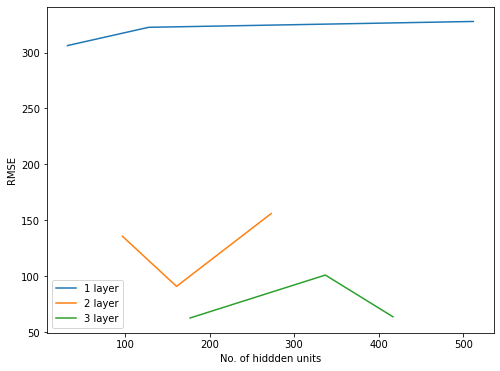

In [34]:
plot_3(hiddent_units_1_list, uni_model_1_err, hiddent_units_2_list, uni_model_2_err, hiddent_units_3_list, uni_model_3_err, "No. of hiddden units", "RMSE")

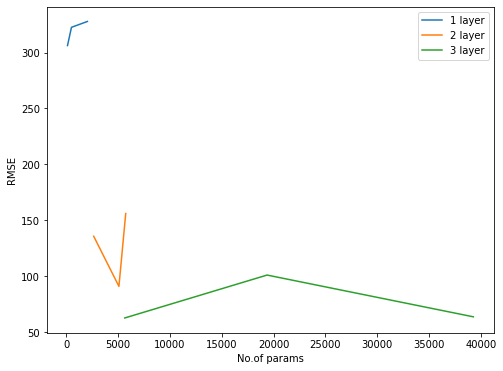

In [35]:
plot_3(uni_model_1_params, uni_model_1_err, uni_model_2_params, uni_model_2_err, uni_model_3_params, uni_model_3_err, "No.of params", "RMSE")

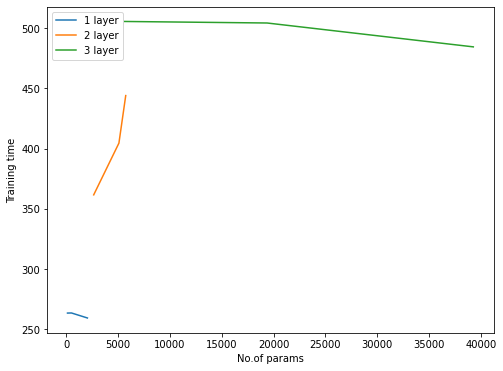

In [36]:
plot_3(uni_model_1_params, uni_model_1_time, uni_model_2_params, uni_model_2_time, uni_model_3_params, uni_model_3_time, "No.of params", "Training time")

**4.2**
Compare:

Depth of network/no. of hidden units vs no. of parameters

RMSE vs no. of parameters

Training time vs no. of parameters




As seen from the first graph, as depth of network increases, RMSE usually decreases. This is because as depth increases, the model is able to learn more complex representations from the data. Hence, RMSE is lesser for 3-layer model compared to 1-layer i.e. accuracy mostly increases as depth increases.

As seen from 2nd plot, as no. of parameters increases, RMSE usually decreases. So we can say as we go deeper, the model has to learn a lot more parameters but the accuracy increases.


As seen form 3rd plot, as no. of parameters (and depth) increases, training time increases a lot.

Based on all these observations, we can deduce that there is a tradeoff between more parameters (~ less RMSE) vs training time. Bigger models may represent data with better accuracy but will require a lot more training time.